In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## 1. Data Processing for Neural Network Training with Keras and TensorFlow 

In [2]:
train_labels = []
train_samples = []

Example data:
1. An experiement drug was tested on individuals from ages 13 to 100 in a clinical trial.
2. The trial had 2100 participants. Half were under 65 years old, half were 65 years old or older.
3. Around 95% of patients 65 or older experienced side effects (y=1).
3. Around 95% of patients under 65 experienced no side effects (y=0).

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experienced side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experienced side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

61
65
60
74
18
66
63
85
63
67
13
79
46
67
27
67
17
89
54
91
48
69
55
75
62
78
35
74
60
88
15
66
50
89
17
95
61
99
61
95
48
90
61
94
19
94
35
65
31
89
34
68
53
78
21
74
63
83
30
100
26
74
15
86
16
78
61
68
59
95
58
76
36
90
35
71
15
80
43
92
57
89
54
84
45
69
33
70
30
89
42
97
51
82
14
84
52
82
40
70
27
81
40
90
34
73
16
78
16
79
44
70
64
87
15
74
15
87
63
81
14
76
57
74
14
77
14
73
47
94
36
66
54
88
38
86
32
100
56
82
40
97
39
66
53
95
45
78
55
70
30
72
48
82
23
90
42
86
47
65
39
96
19
97
29
84
19
94
49
66
21
93
16
71
35
84
29
73
32
69
24
87
37
82
45
84
38
77
23
92
25
99
43
76
13
75
60
74
55
65
25
89
19
71
51
74
31
95
45
92
13
65
39
80
45
83
20
77
34
99
54
73
62
68
16
84
31
84
47
79
27
74
35
73
23
89
50
76
45
73
53
67
45
76
26
84
15
69
43
98
57
71
53
79
53
93
63
92
19
80
29
89
59
92
45
70
45
84
30
100
58
79
20
87
56
92
42
69
13
67
53
93
44
96
62
80
16
98
23
96
45
80
23
68
38
74
45
90
24
85
13
69
15
69
46
76
26
71
57
67
41
93
44
77
36
76
61
75
27
83
54
92
43
94
15
91
45
88
47
65
25
69
3

In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaler_train_samples:
    print(i)

[0.96551724]
[0.47126437]
[0.88505747]
[0.68965517]
[0.67816092]
[0.70114943]
[0.17241379]
[0.11494253]
[0.70114943]
[0.40229885]
[0.05747126]
[0.75862069]
[0.35632184]
[0.50574713]
[0.70114943]
[0.63218391]
[0.26436782]
[0.18390805]
[0.90804598]
[0.25287356]
[0.09195402]
[0.63218391]
[0.1954023]
[0.91954023]
[0.95402299]
[0.73563218]
[0.54022989]
[0.81609195]
[0.77011494]
[0.22988506]
[0.20689655]
[0.45977011]
[0.62068966]
[0.13793103]
[0.90804598]
[0.75862069]
[0.09195402]
[1.]
[0.54022989]
[1.]
[0.93103448]
[0.14942529]
[0.79310345]
[0.87356322]
[0.25287356]
[0.73563218]
[0.33333333]
[0.12643678]
[0.56321839]
[0.31034483]
[0.37931034]
[0.64367816]
[0.11494253]
[0.91954023]
[0.56321839]
[0.08045977]
[0.34482759]
[0.09195402]
[0.98850575]
[0.77011494]
[0.68965517]
[0.45977011]
[0.91954023]
[0.26436782]
[0.47126437]
[0.24137931]
[0.87356322]
[0.27586207]
[0.86206897]
[0.12643678]
[0.82758621]
[0.49425287]
[0.29885057]
[0.20689655]
[0.55172414]
[0.55172414]
[0.86206897]
[0.1954023]
[0.6

## 2. Create an Artificial Neural Network with TensorFlow's Keras API

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 3. Train an Artificial Neural Network with TensorFlow's Keras API

In [14]:
X_train = scaler_train_samples
y_train = train_labels

In [15]:
model.fit(  x=X_train, y=y_train, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 3s - loss: 0.6540 - accuracy: 0.5455 - val_loss: 0.6307 - val_accuracy: 0.6238
Epoch 2/30
1890/1890 - 1s - loss: 0.6222 - accuracy: 0.6376 - val_loss: 0.5953 - val_accuracy: 0.7000
Epoch 3/30
1890/1890 - 1s - loss: 0.5900 - accuracy: 0.6968 - val_loss: 0.5620 - val_accuracy: 0.7286
Epoch 4/30
1890/1890 - 1s - loss: 0.5582 - accuracy: 0.7540 - val_loss: 0.5295 - val_accuracy: 0.7714
Epoch 5/30
1890/1890 - 1s - loss: 0.5260 - accuracy: 0.7974 - val_loss: 0.4971 - val_accuracy: 0.8048
Epoch 6/30
1890/1890 - 1s - loss: 0.4937 - accuracy: 0.8238 - val_loss: 0.4653 - val_accuracy: 0.8238
Epoch 7/30
1890/1890 - 1s - loss: 0.4618 - accuracy: 0.8466 - val_loss: 0.4342 - val_accuracy: 0.8429
Epoch 8/30
1890/1890 - 1s - loss: 0.4319 - accuracy: 0.8582 - val_loss: 0.4054 - val_accuracy: 0.8762
Epoch 9/30
1890/1890 - 1s - loss: 0.4045 - accuracy: 0.8783 - val_loss: 0.3789 - val_accuracy: 0.8810
Epoch 10/30
1890/1890 - 1s - loss: 

## 4. Build a Test Set with TensorFlow's Keras API

In [16]:
test_labels = []
test_samples = []

In [17]:
for i in range(10):
    # The ~5% of younger individuals who did experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experienced side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experienced side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [20]:
X_test = scaler_test_samples
y_test = test_labels

## 5. Neural Network Predictions with TensorFlow's Keras API

In [21]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

In [22]:
for i in predictions:
    print(i)
    
# the first prediction in our test set says that the patient has 3.89% probability of not experienced side effects and a 96.1% probability of experienced side effects

[0.96341205 0.03658799]
[0.05814556 0.9418545 ]
[0.06783422 0.93216574]
[0.02249641 0.97750354]
[0.96459466 0.0354053 ]
[0.96371645 0.03628356]
[0.9644608  0.03553921]
[0.41030845 0.5896915 ]
[0.9643395  0.03566053]
[0.05380256 0.94619745]
[0.9631785  0.03682141]
[0.9515649  0.04843509]
[0.79588795 0.20411201]
[0.9631785  0.03682141]
[0.27102846 0.72897154]
[0.09742092 0.90257907]
[0.963644   0.03635598]
[0.9643395  0.03566053]
[0.8794794  0.12052058]
[0.33714342 0.6628566 ]
[0.02437744 0.9756226 ]
[0.9465236  0.05347635]
[0.21369906 0.78630096]
[0.96257454 0.03742544]
[0.02861033 0.97138965]
[0.0162935 0.9837065]
[0.96452135 0.03547871]
[0.05380256 0.94619745]
[0.01502663 0.9849733 ]
[0.6036531  0.39634687]
[0.9644001  0.03559982]
[0.03355293 0.96644706]
[0.11065102 0.889349  ]
[0.03632409 0.9636759 ]
[0.07322221 0.92677784]
[0.1657391 0.8342609]
[0.24120383 0.7587961 ]
[0.92111176 0.07888821]
[0.961504   0.03849595]
[0.01502663 0.9849733 ]
[0.9515649  0.04843509]
[0.961504   0.038495

In [23]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [24]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
0
0
1
1
0
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
0


## 6. Create a Confusion Matrix for Neural Network Predictions

In [25]:
y_pred=rounded_predictions

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


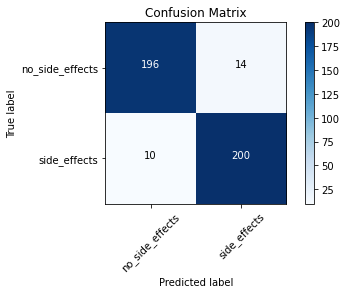

In [29]:
cm_plot_labels = ['no_side_effects', 'side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  396 correct predictions.
 The result is telling us that we have:  24 incorrect predictions.
 We have a total predictions of:  420


## 7. Create a Classification Report for Neural Network Predictions

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       210
           1       0.93      0.95      0.94       210

    accuracy                           0.94       420
   macro avg       0.94      0.94      0.94       420
weighted avg       0.94      0.94      0.94       420



In [32]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Artificial Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Artificial Neural Network model: 94.29%

Well, you got a classification rate of 94.29%


In [33]:
#calculate Precision
print("Precision of the Artificial Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a patient will experience side effect, that patient actually did", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")

Precision of the Artificial Neural Network model: 93.46%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a patient will experience side effect, that patient actually did 93.46% of the time.


In [34]:
#calculate Recall
print("Recall of the Artificial Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is a patient which experienced side effect in the test set, our Artificial Neural Network model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Recall of the Artificial Neural Network model: 95.24%

Recall: If there is a patient which experienced side effect in the test set, our Artificial Neural Network model can identify it 95.24% of the time.


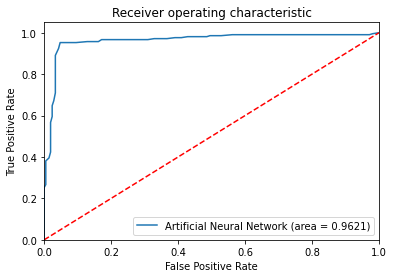

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ann_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.4f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

## 8. Deployment of the Artificial Neural Network

In [36]:
age = 5
new_pred = np.array(age)
scaler_new_pred = scaler.fit_transform(new_pred.reshape(-1,1))
new_pred = model.predict(x=scaler_new_pred.reshape(-1,1), batch_size=10, verbose=0)
rounded_new_pred = np.argmax(scaler_new_pred, axis=-1)
print(age)
new_pred[0][0]

5


0.96076417

## 9. Save and Load a Model with TensorFlow's Keras API

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [38]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\medical_trial_model.h5') is False:
    model.save('C:\\Users\\רועי\\models\\medical_trial_model.h5')

This save functions saves:
1. The architecture of the model allowing to re-create the moddel.
2. The weights of the model.
3. The training configuration (loss, optimizer).
4. The state of the optimizer, allowing to resume training exactly where you left off.

In [39]:
from tensorflow.keras.models import load_model
new_model = load_model('C:\\Users\\רועי\\models\\medical_trial_model.h5')

In [40]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
new_model.get_weights()

[array([[-0.1957401 ,  0.70088005,  0.55371785, -0.19470528, -0.4281826 ,
         -0.04612941,  0.21005657,  0.61400914, -0.14110845,  0.56942123,
         -0.21934912,  0.10586765,  0.21677618, -0.13590312, -0.03210157,
         -0.51785004]], dtype=float32),
 array([ 0.        , -0.13798289, -0.13241398,  0.        ,  0.        ,
         0.22307517, -0.0388127 , -0.10989464,  0.        , -0.09587134,
         0.        ,  0.20313697,  0.19935992,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.81401521e-01, -1.76534846e-01,  1.95834249e-01,
          1.80630118e-01, -1.40403703e-01, -3.14510822e-01,
         -2.07160190e-01,  1.87564105e-01,  1.14399016e-01,
         -3.22368860e-01, -1.95855141e-01, -1.37663156e-01,
          2.56504089e-01, -1.47965699e-01, -2.71148711e-01,
          2.55932242e-01,  9.39164162e-02, -2.97280669e-01,
          3.28756481e-01,  1.74948305e-01,  1.94346458e-01,
          2.98387736e-01,  1.71173662e-01, -2.50112802e-01,
 

In [42]:
new_model.optimizer

### 2. model.to_json()

if you only need to save architecture of a model, and not its weights or its training configuration, you can see the following function to save the architecture only.

In [43]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [44]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [45]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [46]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of the model, you cab use the following function save the weights only.

In [47]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\my_model_weights.h5') is False:
    model.save_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [48]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [49]:
model2.load_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [50]:
model2.get_weights()

[array([[-0.1957401 ,  0.70088005,  0.55371785, -0.19470528, -0.4281826 ,
         -0.04612941,  0.21005657,  0.61400914, -0.14110845,  0.56942123,
         -0.21934912,  0.10586765,  0.21677618, -0.13590312, -0.03210157,
         -0.51785004]], dtype=float32),
 array([ 0.        , -0.13798289, -0.13241398,  0.        ,  0.        ,
         0.22307517, -0.0388127 , -0.10989464,  0.        , -0.09587134,
         0.        ,  0.20313697,  0.19935992,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.81401521e-01, -1.76534846e-01,  1.95834249e-01,
          1.80630118e-01, -1.40403703e-01, -3.14510822e-01,
         -2.07160190e-01,  1.87564105e-01,  1.14399016e-01,
         -3.22368860e-01, -1.95855141e-01, -1.37663156e-01,
          2.56504089e-01, -1.47965699e-01, -2.71148711e-01,
          2.55932242e-01,  9.39164162e-02, -2.97280669e-01,
          3.28756481e-01,  1.74948305e-01,  1.94346458e-01,
          2.98387736e-01,  1.71173662e-01, -2.50112802e-01,
 